<a href="https://colab.research.google.com/github/mikolaj553/Machine-Learning-Homeworks-Repo/blob/main/ml-hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework #1 - Mikołaj Kowalewski (Lab group 1)

In [10]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Downloading the data
url = "https://raw.githubusercontent.com/SzymonNowakowski/Machine-Learning-2024/refs/heads/master/PCA_three_clusters_data.csv"
df = pd.read_csv(url)
print(df.head())

          x         y          z  class
0  0.647689 -0.138264   3.512299      0
1 -0.234137 -0.234153  10.769447      0
2 -0.469474  0.767435  11.166721      0
3 -0.465730 -0.463418   3.836479      0
4 -1.724918 -1.913280   1.710932      0


In [15]:
#Separating features and classes
X = df[['x', 'y', 'z']]
y = df['class']
print(X.head())
print(y.head())

          x         y          z
0  0.647689 -0.138264   3.512299
1 -0.234137 -0.234153  10.769447
2 -0.469474  0.767435  11.166721
3 -0.465730 -0.463418   3.836479
4 -1.724918 -1.913280   1.710932
0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64


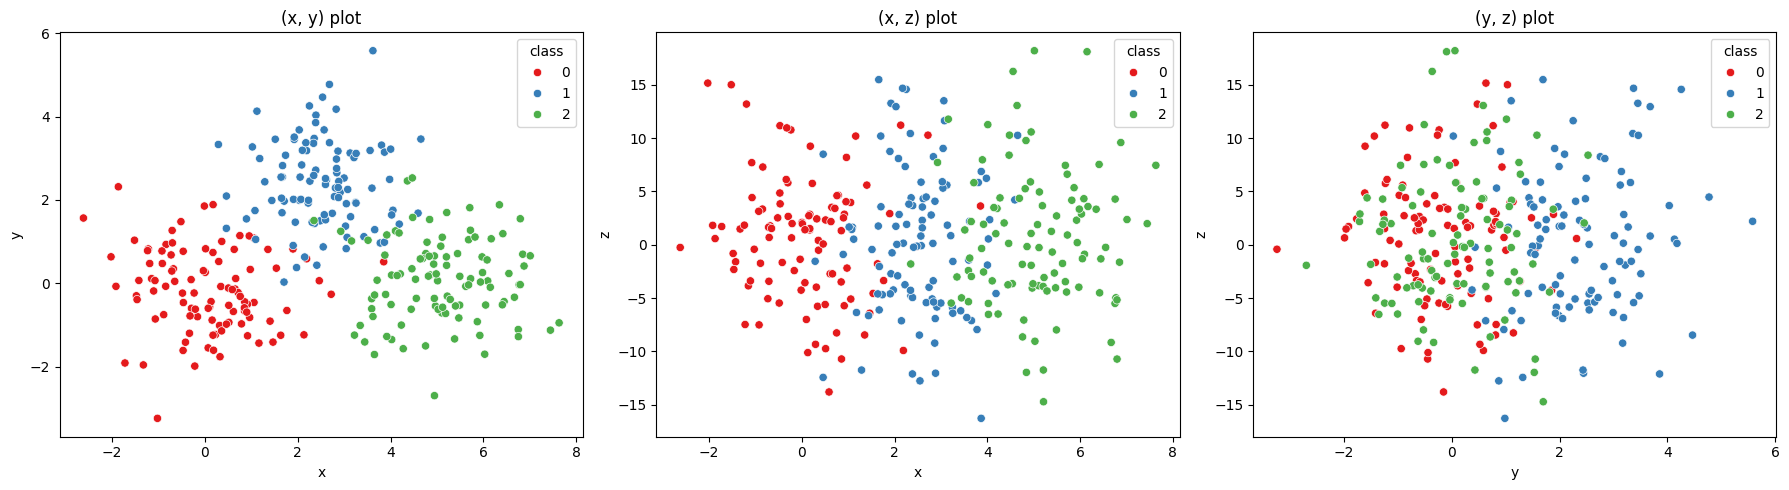

In [18]:
#Visualizing original feature pairs

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs = axs.ravel()

# (x, y)
sns.scatterplot(x='x', y='y', hue=y, data=df, ax=axs[0], palette='Set1')
axs[0].set_title('(x, y) plot')

# (x, z)
sns.scatterplot(x='x', y='z', hue=y, data=df, ax=axs[1], palette='Set1')
axs[1].set_title('(x, z) plot')

# (y, z)
sns.scatterplot(x='y', y='z', hue=y, data=df, ax=axs[2], palette='Set1')
axs[2].set_title('(y, z) plot')

plt.tight_layout()
plt.show()

In [17]:
#Standardizing the features for PCA so that each feature has mean 0 and variance 1

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

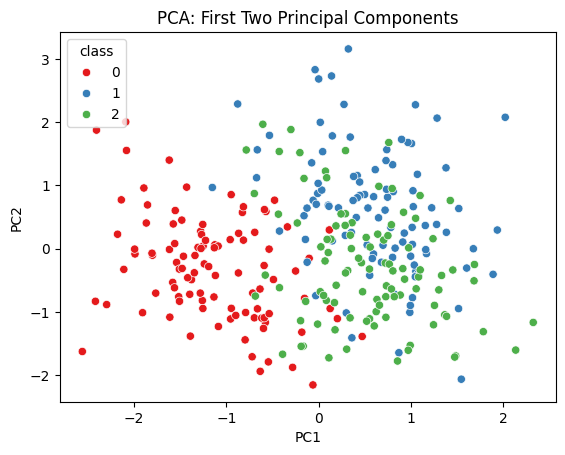

In [24]:
#Performing PCA to find the two principal components

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#Visualizing the two principal components

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['class'] = y
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='class', palette='Set1')
plt.title('PCA: First Two Principal Components')
plt.show()

## Observations on Comparing the Original Plots with the PCA Plot

Let us first notice that in the (x, y) plot, the red, green, and blue clusters are relatively well-separated, indicating that the combination of x and y already captures a substantial portion of the variation that distinguishes these clusters. The (x, z) plot still allows us to roughly see the clusters, but with more overlap between the classes. The (y, z) plot makes it harder to differentiate between the classes. In particular there is a significant overlap between red and green points, corresponding to classes 0 and 2, respectively.


Next, let us consider the PCA plot. Here, red and green appear distinctly separated, with relatively little overlap, however these clusters are not as strongly separated as in the (x, y) plot. The blue and green points, corresponding to classes 1 and 2, respectively, cannot be distinguished as clearly. This overlap indicates that the primary directions of variance (the first two principal components) strongly distinguish red from green but capture less of the differences between blue and green.


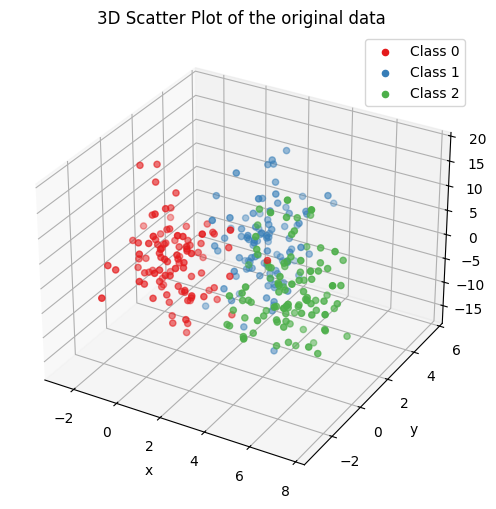

In [32]:
#3D plot of the original data
from mpl_toolkits.mplot3d import Axes3D

#Making the colors of the classes consistent with the previous visualizations
color_map = {
    0: '#e41a1c',
    1: '#377eb8',
    2: '#4daf4a'
}

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
colors = [color_map[label] for label in df['class']]
ax.scatter(
    df['x'],
    df['y'],
    df['z'],
    c=colors
)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("3D Scatter Plot of the original data")

for lbl, clr in color_map.items():
    ax.scatter([], [], [], c=clr, label=f"Class {lbl}")
ax.legend()

plt.show()


**Primary Question: Does PCA improve the separation of data points from different clusters compared to the original feature spaces? Explain why.**

**Answer**: PCA does not necessarily improve the separation of the data points from different clusters as compared to the original feature spaces. In particular, the (x, y) and (x, z) allow us to differentiate between the three clusters quite clearly (especially the (x, y) plot). The PCA plot shows a significant overlap between class 1 and class 2, making these two clusters significantly harder to distinguish. The 3D plot of the original data shows that the the first two coordinates of the data points (x and y) account for (roughly) most of the visible separation among the classes, whereas PCA — being an unsupervised method that seeks directions of maximum variance — does not necessarily focus on the specific class boundaries, and thus does not provide a more pronounced separation than what is already visible in the (x, y) plane.

Let us now inspect the effects of standardizing and differences in scale on PCA to answer the secondary question. To illustrate the differences, we will use the provided dataset and plot two versions of PCA - without and with standardizing.

Explained variance ratio (no standardization): [0.83996129 0.11106345]
Total variance explained (no standardization): 0.9510247370562541

Explained variance ratio (with standardization): [0.34722276 0.33441835]
Total variance explained (with standardization): 0.6816411077913826


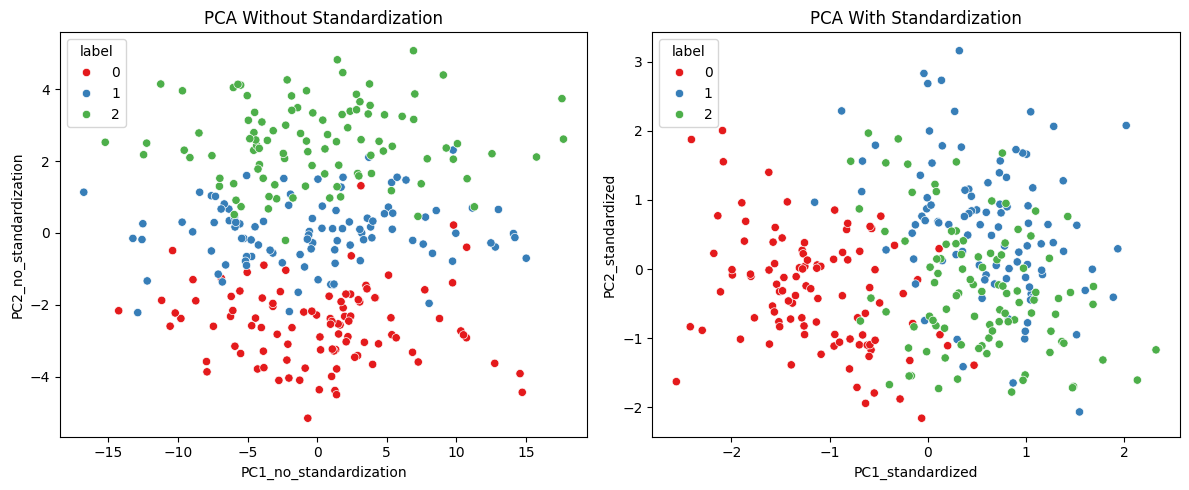

In [44]:
#1) PCA without scaling
pca_no_scale = PCA(n_components=2)
X_pca_no_scale = pca_no_scale.fit_transform(X)
pca_df_no_scale = pd.DataFrame(X_pca_no_scale, columns=['PC1_no_standardization', 'PC2_no_standardization'])
pca_df_no_scale['label'] = y

# Explained variance ratio
evr_no_scale = pca_no_scale.explained_variance_ratio_
print("Explained variance ratio (no standardization):", evr_no_scale)
print("Total variance explained (no standardization):", evr_no_scale.sum())

#2) PCA with scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca_scaled = PCA(n_components=2)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)
pca_df_scaled = pd.DataFrame(X_pca_scaled, columns=['PC1_standardized', 'PC2_standardized'])
pca_df_scaled['label'] = y

# Explained variance ratio
evr_scaled = pca_scaled.explained_variance_ratio_
print("\nExplained variance ratio (with standardization):", evr_scaled)
print("Total variance explained (with standardization):", evr_scaled.sum())

#3) Visual comparison of the two approaches
fig, axs = plt.subplots(1, 2, figsize=(12,5))

# Without scaling
sns.scatterplot(
    data=pca_df_no_scale,
    x='PC1_no_standardization',
    y='PC2_no_standardization',
    hue='label',
    palette='Set1',
    ax=axs[0]
)
axs[0].set_title("PCA Without Standardization")

# With scaling
sns.scatterplot(
    data=pca_df_scaled,
    x='PC1_standardized',
    y='PC2_standardized',
    hue='label',
    palette='Set1',
    ax=axs[1]
)
axs[1].set_title("PCA With Standardization")

plt.tight_layout()
plt.show()


In [40]:
#Inspecting the numeric ranges of the features
summary_stats = df[['x', 'y', 'z']].describe()
print(summary_stats)

                x           y           z
count  300.000000  300.000000  300.000000
mean     2.561883    0.759617    0.473686
std      2.300371    1.529409    6.326528
min     -2.619745   -3.241267  -16.277041
25%      0.701033   -0.441662   -3.998547
50%      2.557802    0.633425    0.563007
75%      4.382826    1.822406    4.104527
max      7.632382    5.578881   18.196402


These summary statistics show that
z spans a much larger numeric range (approximately -16 to 18) with a higher standard deviation (about 6.33) than
x or y. By comparison, x and y both lie within narrower ranges and have lower standard deviations. This explains why the PCA without prior standardization tends to be dominated by z, causing the first principal component to capture mostly the variance from that feature, overshadowing the rest of the features. This can be seen from the fact that PC1 ranges from ca. -15 to ca. 15. Meanwhile, the PCA with standardization applied rescales all features to have mean 0 and variance 1, preventing z’s large range from dominating. As a result, the principal components in the scaled plot reflect a more balanced contribution from x, y, and z. While the numerical total of explained variance is lower (around 68% for the first two components), it represents variance that incorporates all three features rather than being driven almost exclusively by one.

**Secondary question: Why is standardization necessary before applying PCA?**

**Answer:** PCA identifies directions of maximum variance, which can be distorted if one feature has a much larger numeric range than the others, as seen in the above visualization. Standardizing the data by subtracting each feature’s mean and dividing by its standard deviation ensures that all features contribute more equally to the covariance matrix. Without this step, a high‐variance feature can dominate the principal components (like z in the above example) overshadowing potentially important signals from smaller‐scale features (x and y in the above case) and producing misleadingly high explained variance in just one or two components. By scaling each feature to mean 0 and variance 1, PCA more accurately captures the underlying structure of the data across all dimensions.
